In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the packages we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly as ply
import plotly.express as px
from sklearn import preprocessing

import matplotlib as mpl
import requests as rq
from wordcloud import WordCloud
import json
import nltk
import gensim
import spacy
from spacy.attrs import ORTH, NORM
import math
import re
from collections import Counter
sns.set(color_codes=True)

%matplotlib inline

In [ ]:
# read in some data
df = pd.read_csv("/content/drive/Shared drives/OPIM 5770 Advanced BAPM Team 2/Data/Content Data/2020-08-28-08-28-29-Henkel_Laundry_Lifetime_Reviews.csv", encoding='latin1')

#chunks = pd.read_csv("/content/drive/Shared drives/OPIM 5770 Advanced BAPM Team 2/Data/Content Data/Reviews/2020-08-28-08-28-29-Henkel_Laundry_Lifetime_Reviews.csv", encoding='latin1', low_memory=False, chunksize=200000)
#Reviews = pd.concat(chunks)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (5,16,18,19,28,29) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
Reviews = df

In [ ]:
print(Reviews.shape)
Reviews.head(3)

(816075, 30)


,Date,Country,Retailer,UPC,EAN,RPC,Product Model Number,Product Title,Cumulative Star Rating,Cumulative Reviews,Review Summary,Review Text,Star Rating,Unique Review,Duplicate Group,URL,Review URL,Manufacturer Comment,Manufacturer Comment Date,Manufacturer Comment Text,Manufacturer,Brand,Sub Brand,Profitero ID,Account Category,Account Category 2,Account Category 3,Account Category 4,Account Category 5,Account Category 6
0,10/21/2010,United States,"Walmart 3P (Dallas, TX 75201)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Unique,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
1,10/21/2010,United States,"Walmart 1P (Dallas, TX 75201)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
2,10/21/2010,United States,"Walmart 3P (Atlanta, GA 30313)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN


In [ ]:
# Keep data for nearly 5 years
Reviews.Date = pd.to_datetime(Reviews.Date)

In [ ]:
Reviews.Date.dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
816070    2020
816071    2020
816072    2020
816073    2020
816074    2020
Name: Date, Length: 816075, dtype: int64

In [ ]:
print(Reviews.shape)
Reviews.head(3)

(816075, 30)


,Date,Country,Retailer,UPC,EAN,RPC,Product Model Number,Product Title,Cumulative Star Rating,Cumulative Reviews,Review Summary,Review Text,Star Rating,Unique Review,Duplicate Group,URL,Review URL,Manufacturer Comment,Manufacturer Comment Date,Manufacturer Comment Text,Manufacturer,Brand,Sub Brand,Profitero ID,Account Category,Account Category 2,Account Category 3,Account Category 4,Account Category 5,Account Category 6
0,2010-10-21,United States,"Walmart 3P (Dallas, TX 75201)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Unique,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
1,2010-10-21,United States,"Walmart 1P (Dallas, TX 75201)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
2,2010-10-21,United States,"Walmart 3P (Atlanta, GA 30313)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN


#Sentiment Analysis (Best& Worst Sentiment Words)

In [ ]:
# NLTK Stop words
#nltk.download('stopwords')
# Run in python console
import nltk; nltk.download('stopwords')
# Run in terminal or command prompt
#python3 -m spacy download en
nltk.download("popular")
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'that', 'and',  'in','will','be','issue','like','can','seem','mine','smelling','looking','clothes'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

In [ ]:
data = Reviews['Review Text'].values.tolist()

In [ ]:
# define a function to cut the sentences into words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['it', 'smells', 'so', 'good', 'makes', 'the', 'sheets', 'and', 'towels', 'feel', 'softer']]


In [ ]:
def remove_stopwords(texts):
    return [[word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
data_no_stopwords = remove_stopwords(data_words)

In [ ]:
#Get requests response "Failed to establish a new connection: [Errno -2]"
url_web = "https://raw.githubusercontent.com/hyharryhuang/AFINN-json/master/AFINN.json"
#We are going to hardcode the Afinn-111 json

In [ ]:
afinn_data = rq.get(url_web)

In [ ]:
afinn_data.text

'{"abandon":"-2","abandoned":"-2","abandons":"-2","abducted":"-2","abduction":"-2","abductions":"-2","abhor":"-3","abhorred":"-3","abhorrent":"-3","abhors":"-3","abilities":"2","ability":"2","aboard":"1","absentee":"-1","absentees":"-1","absolve":"2","absolved":"2","absolves":"2","absolving":"2","absorbed":"1","abuse":"-3","abused":"-3","abuses":"-3","abusive":"-3","accept":"1","accepted":"1","accepting":"1","accepts":"1","accident":"-2","accidental":"-2","accidentally":"-2","accidents":"-2","accomplish":"2","accomplished":"2","accomplishes":"2","accusation":"-2","accusations":"-2","accuse":"-2","accused":"-2","accuses":"-2","accusing":"-2","ache":"-2","achievable":"1","aching":"-2","acquit":"2","acquits":"2","acquitted":"2","acquitting":"2","acrimonious":"-3","active":"1","adequate":"1","admire":"3","admired":"3","admires":"3","admiring":"3","admit":"-1","admits":"-1","admitted":"-1","admonish":"-2","admonished":"-2","adopt":"1","adopts":"1","adorable":"3","adore":"3","adored":"3","ad

In [ ]:
# convert to dictionary
score_word_dict = json.loads(afinn_data.text)

In [ ]:
# Set the score of each word definition.
def definition_score(words, score_word_dict):
    score = 0
    #words = df.lower().split(" ")
    for word in words:
        if(word in score_word_dict):
            score += int(score_word_dict[word])
            
    return score

In [ ]:
Reviews['Review Text'] = Reviews['Review Text'].astype(str)

In [ ]:
scores=[]
for d in data_no_stopwords:
    score = definition_score(d, score_word_dict)
    #print(score)
    scores.append(score)

In [ ]:
Reviews

,Date,Country,Retailer,UPC,EAN,RPC,Product Model Number,Product Title,Cumulative Star Rating,Cumulative Reviews,Review Summary,Review Text,Star Rating,Unique Review,Duplicate Group,URL,Review URL,Manufacturer Comment,Manufacturer Comment Date,Manufacturer Comment Text,Manufacturer,Brand,Sub Brand,Profitero ID,Account Category,Account Category 2,Account Category 3,Account Category 4,Account Category 5,Account Category 6
0,2010-10-21,United States,"Walmart 3P (Dallas, TX 75201)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Unique,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
1,2010-10-21,United States,"Walmart 1P (Dallas, TX 75201)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
2,2010-10-21,United States,"Walmart 3P (Atlanta, GA 30313)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
3,2010-10-21,United States,"Walmart 1P (Atlanta, GA 30313)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
4,2010-10-21,United States,"Walmart 3P (Bentonville, AR 72712)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816070,2020-08-27,United States,"Target (Tucson, AZ 85716)",7.261316e+10,NaN,78138968,NaN,"Snuggle SuperCare In-Wash Scent Booster, Lilie...",4.8,156,-,I Love love this new scent. It has a clean spr...,5,Unique,133470,https://www.target.com/p/snuggle-supercare-lil...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,971055698,Laundry Care *** Fabric Finishers *** In-Wash ...,NaN,NaN,NaN,NaN,NaN
816071,2020-08-27,United States,"Target (Baltimore, MD 21224)",7.261316e+10,NaN,78138968,NaN,"Snuggle SuperCare In-Wash Scent Booster, Lilie...",4.8,156,-,I Love love this new scent. It has a clean spr...,5,Duplicate,133470,https://www.target.com/p/snuggle-supercare-lil...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,971055698,Laundry Care *** Fabric Finishers *** In-Wash ...,NaN,NaN,NaN,NaN,NaN
816072,2020-08-27,United States,"Target (New York, NY 10120)",7.261316e+10,NaN,78138968,NaN,"Snuggle SuperCare In-Wash Scent Booster, Lilie...",4.8,156,-,I Love love this new scent. It has a clean spr...,5,Duplicate,133470,https://www.target.com/p/snuggle-supercare-lil...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,971055698,Laundry Care *** Fabric Finishers *** In-Wash ...,NaN,NaN,NaN,NaN,NaN
816073,2020-08-27,United States,"Target (Ontario, CA 91764)",7.261316e+10,NaN,78138968,NaN,"Snuggle SuperCare In-Wash Scent Booster, Lilie...",4.8,156,-,I Love love this new scent. It has a clean spr...,5,Duplicate,133470,https://www.target.com/p/snuggle-supercare-lil...,NaN,N

In [ ]:
# new column for scores
Reviews['Scores'] = scores
# new column for text without stopwords
Reviews['Review Text Words'] = data_no_stopwords
# sort the dataset from top to bottom
Reviews_Sorted_By_Scores_Best = Reviews.sort_values(by = ['Scores'], ascending=False)

In [ ]:
Reviews_Sorted_By_Scores_Best

,Date,Country,Retailer,UPC,EAN,RPC,Product Model Number,Product Title,Cumulative Star Rating,Cumulative Reviews,Review Summary,Review Text,Star Rating,Unique Review,Duplicate Group,URL,Review URL,Manufacturer Comment,Manufacturer Comment Date,Manufacturer Comment Text,Manufacturer,Brand,Sub Brand,Profitero ID,Account Category,Account Category 2,Account Category 3,Account Category 4,Account Category 5,Account Category 6,Scores,Review Text Words
522564,2020-03-13,United States,"Walmart 1P (Los Angeles, CA 90039)",2.420004e+10,NaN,572688697,NaN,"Persil ProClean Discs Laundry Detergent, Origi...",4.5,29705,Very nice and mine clothes wer...,Very nice and mine clothes were smelling fresh...,5,Duplicate,81726,https://www.walmart.com/ip/Persil-ProClean-Dis...,NaN,No,NaN,NaN,Henkel,Persil,NaN,882914670,HDD LP *** LP Universal caps,Laundry Care *** Laundry Detergent *** Unit Do...,Target Priority SKUs,NaN,NaN,NaN,126,"[nice, fresh, clean, compare, existing, liquid..."
523931,2020-03-13,United States,"Target (Fridley, MN 55421)",2.420004e+10,NaN,75663983,NaN,"Persil ProClean Discs Laundry Detergent, Origi...",4.5,29655,Very nice and mine clothes wer...,Very nice and mine clothes were smelling fresh...,5,Duplicate,81854,https://www.target.com/p/persil-proclean-origi...,NaN,No,NaN,NaN,Henkel,Persil,NaN,882914670,HDD LP *** LP Universal caps,Laundry Care *** Laundry Detergent *** Unit Do...,Target Priority SKUs,NaN,NaN,NaN,126,"[nice, fresh, clean, compare, existing, liquid..."
523260,2020-03-13,United States,"Walmart 1P (Atlanta, GA 30313)",2.420004e+10,NaN,574265364,NaN,"Persil ProClean Discs Laundry Detergent, Origi...",4.5,29861,Very nice and mine clothes wer...,Very nice and mine clothes were smelling fresh...,5,Duplicate,81793,https://www.walmart.com/ip/Persil-ProClean-Dis...,NaN,No,NaN,NaN,Henkel,Persil,NaN,882914671,Amazon Priority SKUs,HDD LP *** LP Universal caps,Laundry Care *** Laundry Detergent *** Unit Do...,NaN,NaN,NaN,126,"[nice, fresh, clean, compare, existing, liquid..."
523259,2020-03-13,United States,"Walmart 3P (Atlanta, GA 30313)",2.420004e+10,NaN,574265364,NaN,"Persil ProClean Discs Laundry Detergent, Origi...",4.5,29861,Very nice and mine clothes wer...,Very nice and mine clothes were smelling fresh...,5,Duplicate,81793,https://www.walmart.com/ip/Persil-ProClean-Dis...,NaN,No,NaN,NaN,Henkel,Persil,NaN,882914671,Amazon Priority SKUs,HDD LP *** LP Universal caps,Laundry Care *** Laundry Detergent *** Unit Do...,NaN,NaN,NaN,126,"[nice, fresh, clean, compare, existing, liquid..."
523258,2020-03-13,United States,"Walmart 1P (Orlando, FL 32811)",2.420004e+10,NaN,574265364,NaN,"Persil ProClean Discs Laundry Detergent, Origi...",4.5,29861,Very nice and mine clothes wer...,Very nice and mine clothes were smelling fresh...,5,Duplicate,81793,https://www.walmart.com/ip/Persil-ProClean-Dis...,NaN,No,NaN,NaN,Henkel,Persil,NaN,882914671,Amazon Priority SKUs,HDD LP *** LP Universal caps,Laundry Care *** Laundry Detergent *** Unit Do...,NaN,NaN,NaN,126,"[nice, fresh, clean, compare, existing, liquid..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664212,2020-05-09,United States,Amazon 3P,7.261346e+10,NaN,B01ALAV2TQ,NaN,Snuggle Plus SuperFresh Fabric Softener Dryer ...,4.7,1304,ATTEN; REVIEWER KIMBERLY!,Kimberly ( simpleton) who has reviewed this sn...,4,Duplicate,106166,https://www.amazon.com/gp/product/B01ALAV2TQ,https://www.amazon.com/gp/customer-reviews/R1M...,No,NaN,NaN,Henkel,Snuggle,NaN,882914522,FFI *** FFI Dryer Sheet,Laundry Care *** Fabric Finishers *** Fabric S...,NaN,NaN,NaN,NaN,-32,"[kimberly, simpleton, reviewed, snuggle, livid..."
664211,2020-05-09,United States,Amazon 1P,7.261346e+10,NaN,B01ALAV2QY,NaN,Snuggle Plus SuperFresh Fabric Softener Dryer ...,4.7,1304,ATTEN; REVIEWER KIMBERLY!,Kimberly ( simpleton) who has reviewed this sn...,4,Duplicate,106166,https://www.amazon.com/gp/product/B01ALAV2QY,https://www.amazon.com/gp/customer

In [ ]:
Reviews_Sorted_By_Scores_Best.to_csv("/content/drive/Shared drives/OPIM 5770 Advanced BAPM Team 2/Data/Content Data/Reviews/Review with score.csv")

The first method: use generate(text) in wordcloud.
Do not recommend becuase has duplicate words appears 

In [ ]:
# set the size of the image using Golden Section
plotheight = 15
plotwidth = int(plotheight*((1+math.sqrt(5))/2))

In [ ]:
# get each word in each row, and store them to a list
best_sentiment__words = []
for Text in Reviews_Sorted_By_Scores_Best['Review Text Words'][:25].values.tolist():
  for i in Text:
    best_sentiment__words.append(i.lower())
# join the words in the list using space for wordcloud use
best_sentiment__words = ' '.join(best_sentiment__words)

(-0.5, 2399.5, 1499.5, -0.5)

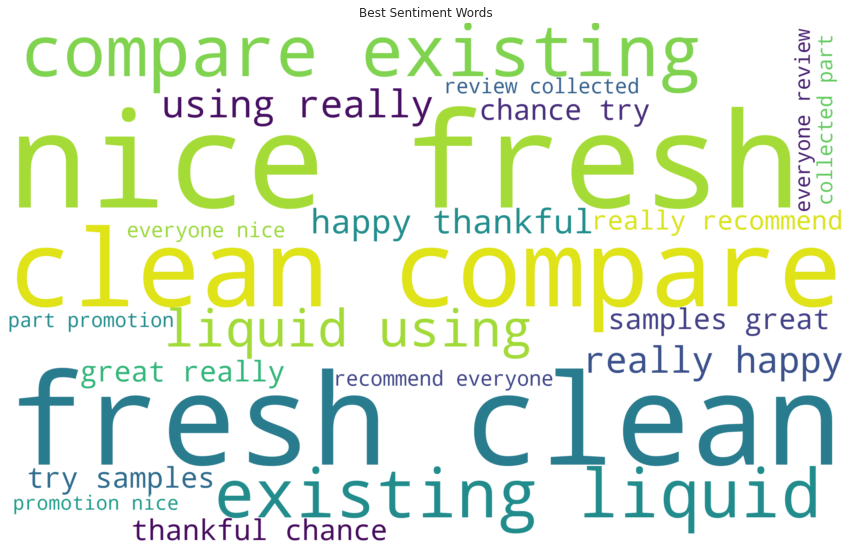

In [ ]:
wordcloud = WordCloud(width=plotwidth*100, height=plotheight*100, background_color='white', relative_scaling=0, normalize_plurals = True).generate(best_sentiment__words)
fig, ax = plt.subplots(1, 1, figsize=(plotheight,plotwidth))
plt.title("Best Sentiment Words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
# sort the dataset from bottom to top
Reviews_Sorted_By_Scores_Worst = Reviews.sort_values(by = ['Scores'])

In [ ]:
# the same like before
worst_sentiment_words = []
for Text in Reviews_Sorted_By_Scores_Worst['Review Text Words'][:25].values.tolist():
  for i in Text:
    worst_sentiment_words.append(i.lower())
worst_sentiment_words = ' '.join(worst_sentiment_words)

(-0.5, 2399.5, 1499.5, -0.5)

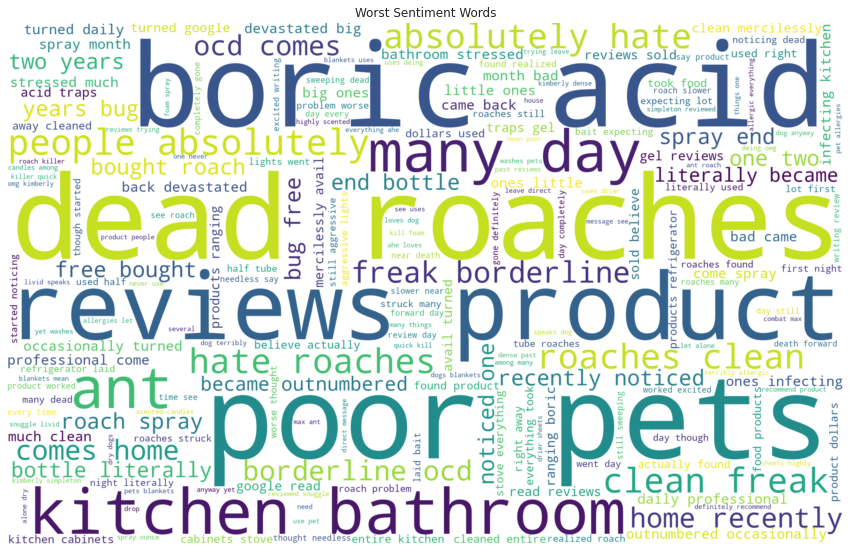

In [ ]:
wordcloud = WordCloud(width=plotwidth*100, height=plotheight*100, background_color='white', relative_scaling=0, normalize_plurals = True).generate(worst_sentiment_words)
#fig, ax = plt.subplots(1, 1, figsize=(plotheight,plotwidth))
plt.figure(figsize = (plotheight, plotwidth))
plt.title("Worst Sentiment Words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

The second method: use generate_from_frequencies in wordcloud

In [ ]:
# funcions we need to use
# define a cleaner function clean the words
def cleaner(df, column: str, limit: int):
  # using regex to abandon to keep words and numbers whose length is within 3 to 50
  pattern = re.compile(r"[A-Za-z0-9\-]{3,50}")
  df['clean'] = df[column].str.findall(pattern).str.join(' ')
  # using limit argument to subset if the dataset is too large
  if limit > 0:
    return df.iloc[:limit, :].copy()
  else:
    return df
# establish a lemmatize function to lemmatize the text
def lemmatize_pipe(doc):
  # get the lowercase of the text tokened using spacy.nlp 
  lemma_list = [str(tok.lemma_).lower() for tok in doc
                # keep the elements which are not punctuation or space and are not in the stopwords list
                if not (tok.is_punct | tok.is_space | tok.is_stop)]
  return lemma_list
# define a preprocess_pipe function for covenience when using nlp.pipe
def preprocess_pipe(texts, nlp, batchsize: int):
  preproc_pipe = []
  docs = nlp.pipe(texts, batch_size=batchsize)
  for doc in docs:
    preproc_pipe.append(lemmatize_pipe(doc))
  return preproc_pipe
# define a comprehensize function for wordcloud use
def text_mining_process(df: pd.DataFrame, columnname: str, rowstosee: int, sizeofbatch: int):  
  # use cleaner function first
  df_cleaned= cleaner(df, columnname, rowstosee)
  # make an empty list for use
  clean = []
  # store the cleaner function result in the list
  for x in df_cleaned['clean']:
    clean.append(str(x))
  # nlp precessor initialization
  nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'ner'])
  # add a special case for nlp.tokenizer
  case = [{ORTH: "was"}, {ORTH: "n't", NORM: "not"}]
  nlp.tokenizer.add_special_case("wasn't", case)
  # use preprocess_pipe function
  df_lemmatized = preprocess_pipe(clean, nlp, sizeofbatch)
  # the same as above
  clean_final = []
  for x in df_lemmatized:
    for y in x:
      clean_final.append(y)
  # count the words frequency
  counts = Counter(clean_final)
  # convert to the dataframe in pandas
  frequency = pd.DataFrame(counts.items(), columns=['Words', 'Frequency'])
  # make an empty dictionary for wordcloud use
  frequency_dict = {}
  # using loop to store
  for i in range(0,len(frequency)):
    frequency_dict[frequency['Words'][i]] = frequency['Frequency'][i]
  return frequency, frequency_dict

In [ ]:
# see the top 25 rows, and set batchsize 40 for nlp use
frequency_best, frequency_best_dict = text_mining_process(Reviews_Sorted_By_Scores_Best, 'Review Text', 25, 40)

In [ ]:
print(frequency_best)
print('\n')
print(frequency_best_dict)

        Words  Frequency
0        nice        175
1      clothe        175
2       smell        175
3       fresh        175
4        look        175
5       clean        175
6     compare        175
7       exist        175
8      liquid        175
9       happy        175
10   thankful        175
11     chance        175
12        try        175
13     sample        175
14      great        175
15  recommend        175
16     review         25
17    collect         25
18  promotion         25


{'nice': 175, 'clothe': 175, 'smell': 175, 'fresh': 175, 'look': 175, 'clean': 175, 'compare': 175, 'exist': 175, 'liquid': 175, 'happy': 175, 'thankful': 175, 'chance': 175, 'try': 175, 'sample': 175, 'great': 175, 'recommend': 175, 'review': 25, 'collect': 25, 'promotion': 25}


(-0.5, 2399.5, 1499.5, -0.5)

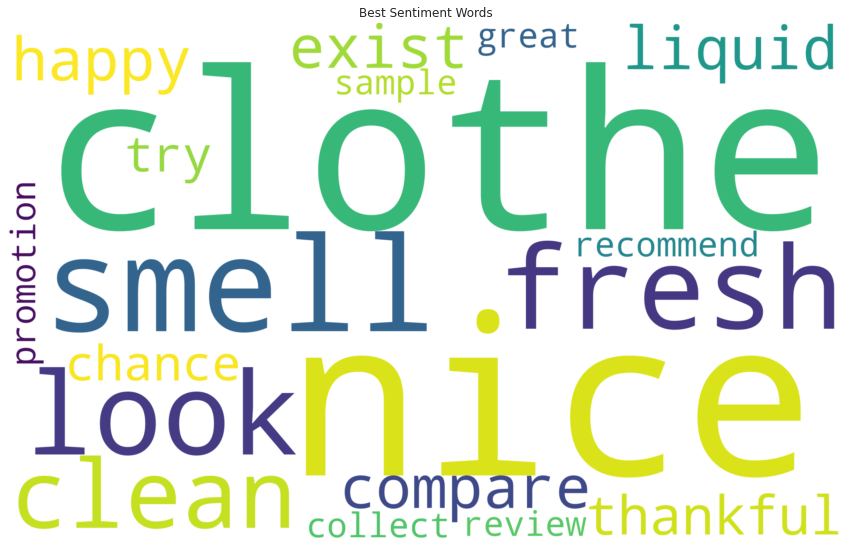

In [ ]:
wordcloud = WordCloud(width=plotwidth*100, height=plotheight*100, background_color='white', relative_scaling=0, normalize_plurals = True).generate_from_frequencies(frequency_best_dict)
fig, ax = plt.subplots(1, 1, figsize=(plotheight,plotwidth))
plt.title("Best Sentiment Words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
frequency_worst, frequency_worst_dict = text_mining_process(Reviews_Sorted_By_Scores_Worst, 'Review Text', 25, 40)

(-0.5, 2399.5, 1499.5, -0.5)

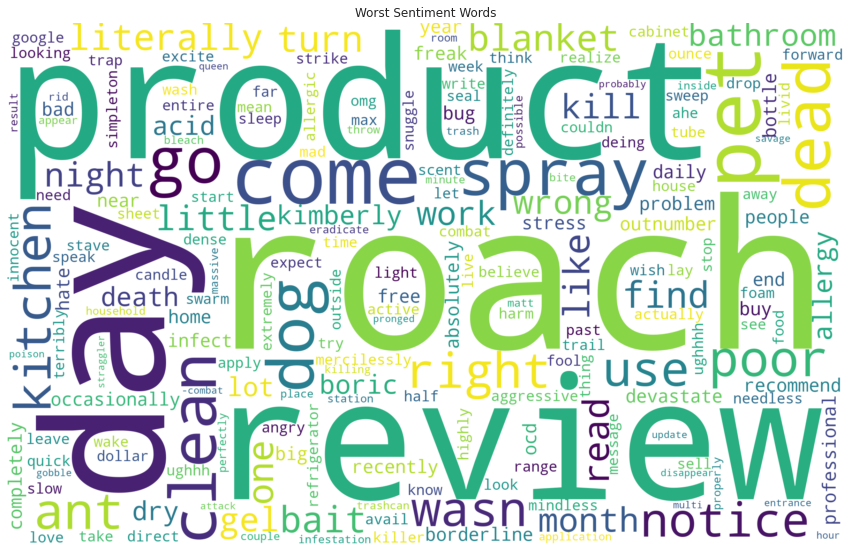

In [ ]:
wordcloud = WordCloud(width=plotwidth*100, height=plotheight*100, background_color='white', relative_scaling=0, normalize_plurals = True).generate_from_frequencies(frequency_worst_dict)
#fig, ax = plt.subplots(1, 1, figsize=(plotheight,plotwidth))
plt.figure(figsize = (plotheight, plotwidth))
plt.title("Worst Sentiment Words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#Length

In [ ]:
Reviews

,Date,Country,Retailer,UPC,EAN,RPC,Product Model Number,Product Title,Cumulative Star Rating,Cumulative Reviews,Review Summary,Review Text,Star Rating,Unique Review,Duplicate Group,URL,Review URL,Manufacturer Comment,Manufacturer Comment Date,Manufacturer Comment Text,Manufacturer,Brand,Sub Brand,Profitero ID,Account Category,Account Category 2,Account Category 3,Account Category 4,Account Category 5,Account Category 6,Scores,Review Text Words
0,2010-10-21,United States,"Walmart 3P (Dallas, TX 75201)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Unique,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN,3,"[smells, good, makes, sheets, towels, feel, so..."
1,2010-10-21,United States,"Walmart 1P (Dallas, TX 75201)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN,3,"[smells, good, makes, sheets, towels, feel, so..."
2,2010-10-21,United States,"Walmart 3P (Atlanta, GA 30313)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN,3,"[smells, good, makes, sheets, towels, feel, so..."
3,2010-10-21,United States,"Walmart 1P (Atlanta, GA 30313)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN,3,"[smells, good, makes, sheets, towels, feel, so..."
4,2010-10-21,United States,"Walmart 3P (Bentonville, AR 72712)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN,3,"[smells, good, makes, sheets, towels, feel, so..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816070,2020-08-27,United States,"Target (Tucson, AZ 85716)",7.261316e+10,NaN,78138968,NaN,"Snuggle SuperCare In-Wash Scent Booster, Lilie...",4.8,156,-,I Love love this new scent. It has a clean spr...,5,Unique,133470,https://www.target.com/p/snuggle-supercare-lil...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,971055698,Laundry Care *** Fabric Finishers *** In-Wash ...,NaN,NaN,NaN,NaN,NaN,8,"[love, love, new, scent, clean, spring, time, ..."
816071,2020-08-27,United States,"Target (Baltimore, MD 21224)",7.261316e+10,NaN,78138968,NaN,"Snuggle SuperCare In-Wash Scent Booster, Lilie...",4.8,156,-,I Love love this new scent. It has a clean spr...,5,Duplicate,133470,https://www.target.com/p/snuggle-supercare-lil...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,971055698,Laundry Care *** Fabric Finishers *** In-Wash ...,NaN,NaN,NaN,NaN,NaN,8,"[love, love, new, scent, clean, spring, time, ..."
816072,2020-08-27,United States,"Target (New York, NY 10120)",7.261316e+10,NaN,78138968,NaN,"Snuggle SuperCare In-Wash Scent Booster, Lilie...",4.8,156,-,I Love love this new scent. It has a clean spr...,5,Duplicate,133470,https://www.target.com/p/snugg

In [ ]:
Reviews['text length'] = Reviews['Product Title'].apply(len)

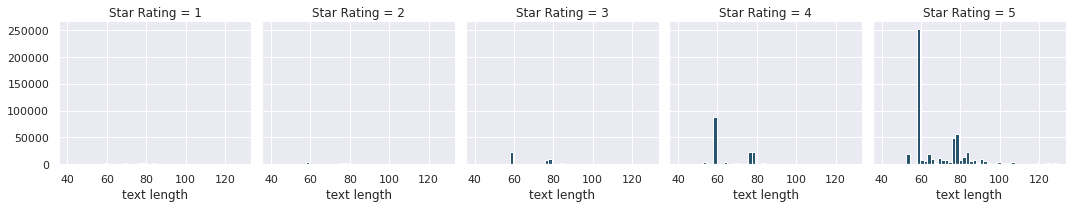

In [ ]:
g = sns.FacetGrid(data=Reviews, col='Star Rating')
g.map(plt.hist, 'text length', bins=50, color='#28546E')
plt.savefig('stars_textlen', dpi=200)

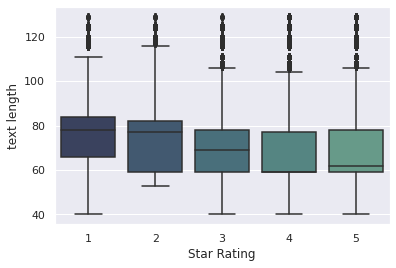

In [ ]:
sns.boxplot(x='Star Rating', y='text length', data=Reviews, palette=sns.cubehelix_palette(9, start=.4, rot=-.70, reverse=True, light=0.85, dark=0.25))
plt.savefig('stars_textlen_box', dpi=200)

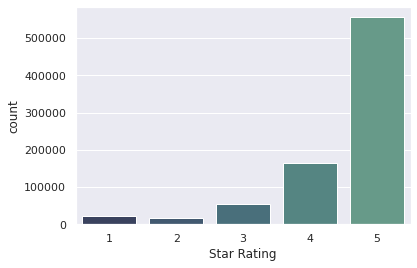

In [ ]:
sns.countplot(x='Star Rating', data=Reviews, palette=sns.cubehelix_palette(9, start=.4, rot=-.70, reverse=True, light=0.85, dark=0.25))

#topic modeling

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Created wheel for pyldavis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=7060dd6cf4a94d0abde83531ef8ac6add2ae463c95486388cce1ec15db6f370f
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyldavis


In [ ]:
df = Reviews
df

,Date,Country,Retailer,UPC,EAN,RPC,Product Model Number,Product Title,Cumulative Star Rating,Cumulative Reviews,Review Summary,Review Text,Star Rating,Unique Review,Duplicate Group,URL,Review URL,Manufacturer Comment,Manufacturer Comment Date,Manufacturer Comment Text,Manufacturer,Brand,Sub Brand,Profitero ID,Account Category,Account Category 2,Account Category 3,Account Category 4,Account Category 5,Account Category 6,Scores,Review Text Words,text length
0,2010-10-21,United States,"Walmart 3P (Dallas, TX 75201)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Unique,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN,3,"[smells, good, makes, sheets, towels, feel, so...",64
1,2010-10-21,United States,"Walmart 1P (Dallas, TX 75201)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN,3,"[smells, good, makes, sheets, towels, feel, so...",64
2,2010-10-21,United States,"Walmart 3P (Atlanta, GA 30313)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN,3,"[smells, good, makes, sheets, towels, feel, so...",64
3,2010-10-21,United States,"Walmart 1P (Atlanta, GA 30313)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN,3,"[smells, good, makes, sheets, towels, feel, so...",64
4,2010-10-21,United States,"Walmart 3P (Bentonville, AR 72712)",7.261345e+10,NaN,1324200,NaN,"Snuggle Liquid Fabric Softener, Blue Sparkle, ...",NaN,0,-,"It smells so good, makes the sheets and towels...",5,Duplicate,1,https://www.walmart.com/ip/Snuggle-Liquid-Fabr...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,882914487,FFI *** FFI Classic Softener,Laundry Care *** Fabric Finishers *** Liquid F...,NaN,NaN,NaN,NaN,3,"[smells, good, makes, sheets, towels, feel, so...",64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816070,2020-08-27,United States,"Target (Tucson, AZ 85716)",7.261316e+10,NaN,78138968,NaN,"Snuggle SuperCare In-Wash Scent Booster, Lilie...",4.8,156,-,I Love love this new scent. It has a clean spr...,5,Unique,133470,https://www.target.com/p/snuggle-supercare-lil...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,971055698,Laundry Care *** Fabric Finishers *** In-Wash ...,NaN,NaN,NaN,NaN,NaN,8,"[love, love, new, scent, clean, spring, time, ...",67
816071,2020-08-27,United States,"Target (Baltimore, MD 21224)",7.261316e+10,NaN,78138968,NaN,"Snuggle SuperCare In-Wash Scent Booster, Lilie...",4.8,156,-,I Love love this new scent. It has a clean spr...,5,Duplicate,133470,https://www.target.com/p/snuggle-supercare-lil...,NaN,No,NaN,NaN,Henkel,Snuggle,NaN,971055698,Laundry Care *** Fabric Finishers *** In-Wash ...,NaN,NaN,NaN,NaN,NaN,8,"[love, love, new, scent, clean, spring, time, ...",67
816072,2020-08-27,United States,"Target (New York, NY 10120)",7.261316e+10,NaN,78138968,NaN,"Snuggle SuperCare In-Wash Scent Booster, Lilie...",4.8,156,-,I Love love this new scent. It has a clean spr...,5,Duplicate,

In [ ]:

# Convert to list
data = df['Review Text'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['It smells so good, makes the sheets and towels feel softer.']


In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['it', 'smells', 'so', 'good', 'makes', 'the', 'sheets', 'and', 'towels', 'feel', 'softer']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning:

For a faster implementation, use the gensim.models.phrases.Phraser class



['it', 'smells', 'so', 'good', 'makes', 'the', 'sheets', 'and', 'towels', 'feel', 'softer']


In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft']]


In [ ]:
print(data_lemmatized[:20])

[['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft'], ['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft'], ['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft'], ['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft'], ['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft'], ['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft'], ['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft'], ['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft'], ['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft'], ['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft'], ['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft'], ['smell', 'good', 'make', 'sheet', 'towel', 'feel', 'soft'], ['use', 'family', 'come', 'soft', 'smell', 'great'], ['use', 'family', 'come', 'soft', 'smell', 'great'], ['use', 'family', 'come', 'soft', 'smell', 'great'], ['use', 'family', 'come', 'soft', 'smell', 'great'], ['use', 'family', 'come', 'soft', 'smell', 'great'], ['

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]


In [ ]:
id2word[0]

'feel'

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('feel', 1),
  ('good', 1),
  ('make', 1),
  ('sheet', 1),
  ('smell', 1),
  ('soft', 1),
  ('towel', 1)]]

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.400*"smell" + 0.251*"love" + 0.106*"fresh" + 0.051*"be" + 0.037*"stuff" + '
  '0.036*"day" + 0.021*"add" + 0.010*"cleaner" + 0.006*"budget" + '
  '0.006*"longer"'),
 (1,
  '0.198*"easy" + 0.075*"strong" + 0.055*"help" + 0.045*"open" + 0.044*"first" '
  '+ 0.043*"clear" + 0.040*"overpower" + 0.039*"size" + 0.033*"market" + '
  '0.030*"close"'),
 (2,
  '0.153*"year" + 0.073*"package" + 0.067*"can" + 0.054*"top" + 0.043*"live" + '
  '0.035*"packaging" + 0.034*"break" + 0.032*"hand" + 0.031*"rid" + '
  '0.028*"soon"'),
 (3,
  '0.288*"persil" + 0.144*"bottle" + 0.063*"bag" + 0.060*"color" + '
  '0.059*"plastic" + 0.042*"however" + 0.036*"continue" + 0.033*"dog" + '
  '0.025*"pro" + 0.023*"pleased"'),
 (4,
  '0.255*"brand" + 0.066*"money" + 0.058*"big" + 0.055*"less" + 0.048*"happy" '
  '+ 0.045*"month" + 0.044*"one" + 0.029*"worth" + 0.027*"stick" + '
  '0.026*"difference"'),
 (5,
  '0.127*"wonderful" + 0.116*"need" + 0.070*"order" + 0.066*"lot" + '
  '0.059*"problem" + 0.059*"exc

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.8425570427810145

Coherence Score:  0.4684305671206014


In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.256191 -0.255127       1        1  23.387971
7     -0.158078 -0.185688       2        1   9.951155
6     -0.147151  0.228014       3        1   7.953760
12    -0.107390  0.071593       4        1   7.534000
0     -0.093389  0.116578       5        1   6.973872
16    -0.123576  0.238878       6        1   6.686724
18    -0.055860 -0.058781       7        1   5.613603
11    -0.030386  0.004963       8        1   5.221254
13    -0.041956  0.007636       9        1   5.201792
9      0.034923 -0.026878      10        1   2.957070
1      0.070944 -0.027530      11        1   2.899236
15     0.079367 -0.001632      12        1   2.300697
4      0.069826 -0.001518      13        1   2.134191
5      0.082823 -0.020802      14        1   2.098247
10     0.107545 -0.006970      15        1   1.805456
3      0.127093 -0.032649      16        1   1.759140
17     0.059813 -0.003407      17        1   1.687031
2      0.106581 -0.016657      18        1   1.540059
8      0.127777 -0.013912      19        1   1.239481
19     0.147286 -0.016114      20        1   1.055263, topic_info=                    Term           Freq  ...  logprob  loglift
71                 clean  272178.000000  ...  30.0000  30.0000
4                  smell  274687.000000  ...  29.0000  29.0000
10                   use  247046.000000  ...  28.0000  28.0000
325               review  290430.000000  ...  27.0000  27.0000
9                  great  215890.000000  ...  26.0000  26.0000
...                  ...            ...  ...      ...      ...
4773          powerhouse     289.268322  ...  -5.8834   2.5618
9888               snake     258.244271  ...  -5.9968   2.1854
12349  swiftly_undamaged     177.041015  ...  -6.3744   2.2450
3996              accord     158.199080  ...  -6.4869   1.9255
5981                gown     139.911161  ...  -6.6097   2.0745

[659 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1322     19  0.998714     ability
108      19  0.999808        able
89        4  0.999957  absolutely
1088     18  0.998952    accident
3996      1  0.070915      accord
...     ...       ...         ...
535      13  0.999815       worth
183       1  0.999994       would
2513     15  0.998527     wrinkle
12       18  0.999951        year
566       8  0.999519         yet

[928 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 8, 7, 13, 1, 17, 19, 12, 14, 10, 2, 16, 5, 6, 11, 4, 18, 3, 9, 20])

In [ ]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2020-10-10 22:22:19--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  17.7MB/s    in 0.9s    

2020-10-10 22:22:20 (17.7 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [ ]:
mallet_path = ('mallet-2.0.8/bin/mallet')

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(3,
  [('promotion', 0.2296783120027672),
   ('part', 0.2249304995067707),
   ('collect', 0.22460253404563332),
   ('review', 0.21039753001012082),
   ('clean', 0.09318062441549124),
   ('love', 0.00260066361761277),
   ('spotless', 0.0017090075201455347),
   ('smelt', 0.0015270891784208976),
   ('expect', 0.0013477330668613962),
   ('amazingly', 0.0011991237172835237)]),
 (16,
  [('smell', 0.14115716850587867),
   ('make', 0.05362901542187258),
   ('soft', 0.0454821207960722),
   ('sheet', 0.03917239143409415),
   ('scent', 0.03756855598319043),
   ('long', 0.036905408093842795),
   ('fabric', 0.03222898742229503),
   ('love', 0.030300946336599133),
   ('feel', 0.028871494219560898),
   ('time', 0.02642275923556241)]),
 (15,
  [('clean', 0.3293345686690104),
   ('fresh', 0.20311710728382684),
   ('leave', 0.16850909367821199),
   ('nice', 0.07130763665900927),
   ('smell', 0.06333464481983983),
   ('feel', 0.041646888604028376),
   ('laundry', 0.041636735160107116),
   ('super', 0.02

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



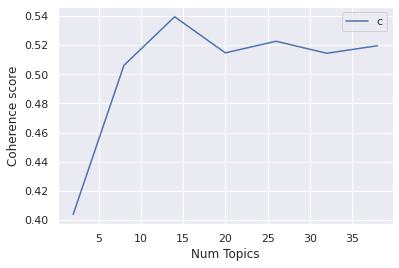

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4039
Num Topics = 8  has Coherence Value of 0.5061
Num Topics = 14  has Coherence Value of 0.5395
Num Topics = 20  has Coherence Value of 0.5147
Num Topics = 26  has Coherence Value of 0.5226
Num Topics = 32  has Coherence Value of 0.5144
Num Topics = 38  has Coherence Value of 0.5196


In [ ]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=1))

[(0, '0.213*"promotion"'),
 (1, '0.119*"scent"'),
 (2, '0.157*"part"'),
 (3, '0.072*"stain"'),
 (4, '0.020*"time"'),
 (5, '0.248*"smell"'),
 (6, '0.168*"good"'),
 (7, '0.202*"collect"')]


In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.1701,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
1,1,1.0,0.1701,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
2,2,1.0,0.1662,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
3,3,1.0,0.1623,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
4,4,1.0,0.1681,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
5,5,1.0,0.1720,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
6,6,1.0,0.1701,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
7,7,1.0,0.1701,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
8,8,1.0,0.1662,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
9,9,1.0,0.1681,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."


In [ ]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.1701,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
1,1,1.0,0.1701,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
2,2,1.0,0.1662,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
3,3,1.0,0.1623,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
4,4,1.0,0.1681,"scent, detergent, strong, long, skin, fragranc...","It smells so good, makes the sheets and towels..."
...,...,...,...,...,...
816070,816070,1.0,0.1794,"scent, detergent, strong, long, skin, fragranc...",I Love love this new scent. It has a clean spr...
816071,816071,1.0,0.1756,"scent, detergent, strong, long, skin, fragranc...",I Love love this new scent. It has a clean spr...
816072,816072,1.0,0.1756,"scent, detergent, strong, long, skin, fragranc...",I Love love this new scent. It has a clean spr...
816073,816073,1.0,0.1756,"scent, detergent, strong, long, skin, fragranc...",I Love love this new scent. It has a clean spr...


In [ ]:
df_dominant_topic.to_csv ('/content/drive/Shared drives/OPIM 5770 Advanced BAPM Team 2/Data/Content Data/Reviews/review_full1.csv', index = False, header=True)